In [1]:
#from thermal_noise_hong import getCoatBrownian
from deap import base, creator, tools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random
import os 
import pocal 
from gwinc import * 

import sys
sys.path.append("pwd")

import YAM_CoatingBrownian 

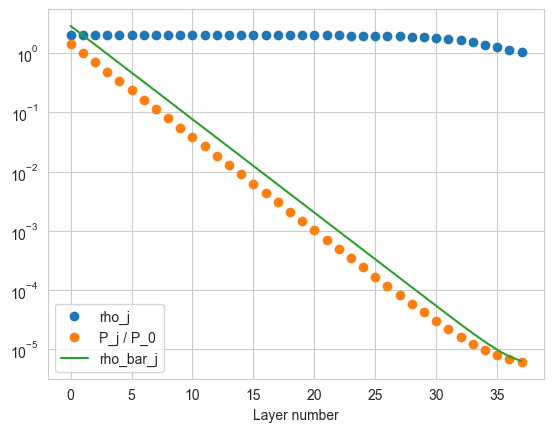

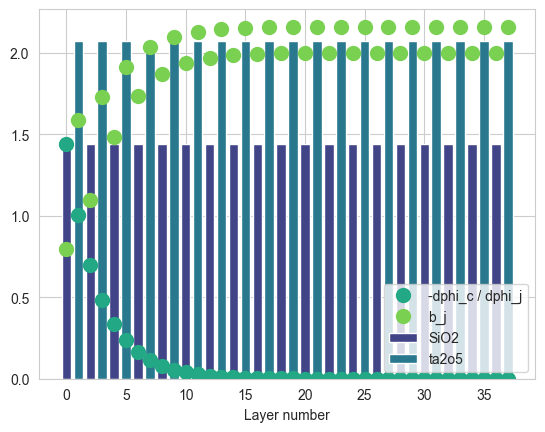

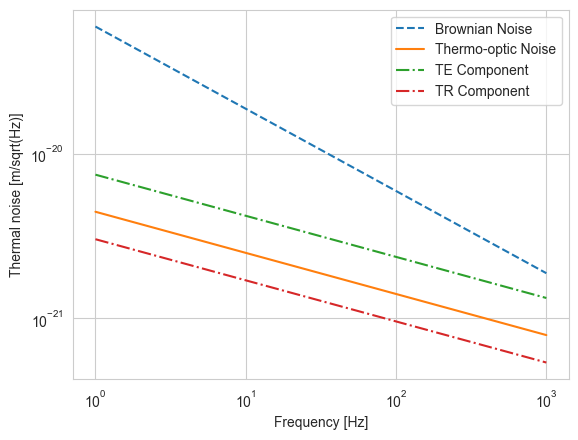

In [2]:
#set up interferometer parameters 

wBeam = 0.062;               # 6cm beam for aLIGO 
lambda_ = 1064e-9;           # laser wavelength

Temp = 293;                  # temperature - Room temperature 
f = np.logspace(0, 3, 100);  # frequencies for plotting

## set up aLIGO Coating Stack to benchmark functions 
num21 = 19  # number of 1-2 doublets (includes cap)
num34 = 0   # number of 3-4 doublets

# Using list comprehension to replicate the behavior of MATLAB's repmat
materialLayer = [1, 2] * num21 + [1, 2] * num34
materialLayer = np.array(materialLayer)

dOpt =np.ones(len(materialLayer))*0.25 
dOpt =np.array(dOpt)


materialParams = {
    1: {
        'name': 'SiO2',
        'n': 1.44,
        'a': 0,
        'alpha': 0.51e-6,
        'beta': 8e-6,
        'kappa': 1.38,
        'C': 1.64e6,
        'Y': 72e9,
        'prat': 0.17,
        'phiM': 4.6e-5
    },
    2: {
        'name': 'ta2o5',
        'n': 2.07,
        'a': 2,
        'alpha': 3.6e-6,
        'beta': 14e-6,
        'kappa': 33,
        'C': 2.1e6,
        'Y': 140e9,
        'prat': 0.23,
        'phiM': 2.44e-4
    }
}

noise_summary = YAM_CoatingBrownian.getCoatingThermalNoise(dOpt, materialLayer, materialParams, materialSub=1, lambda_=lambda_, f=f, wBeam=wBeam, Temp=Temp)
